In [11]:
from keras import models
convnet = models.load_model('augmented_convnet.h5')
convnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [12]:
from keras.preprocessing import image
import numpy as np

In [13]:
img = image.load_img('.data/cat_bengal.jpg', target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

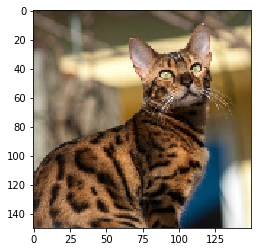

In [14]:
import matplotlib.pyplot as viz

viz.imshow(img_tensor[0])
viz.show()

In [15]:
conv_layers = convnet.layers[:8]
conv_layer_outputs = [layer.output for layer in conv_layers]

activations_model = models.Model(inputs=convnet.input, outputs=conv_layer_outputs)

In [16]:
activations = activations_model.predict(img_tensor)

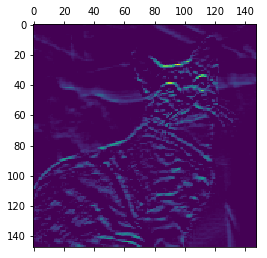

In [17]:
viz.matshow(activations[0][0, :, :, 4], cmap='viridis')

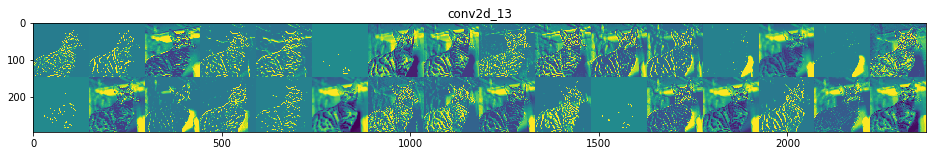

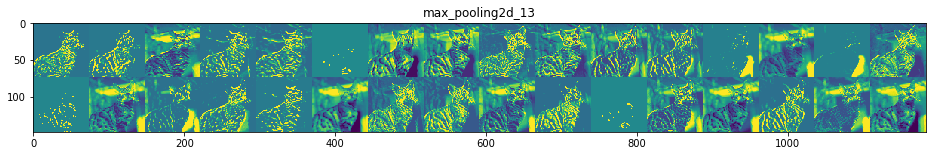

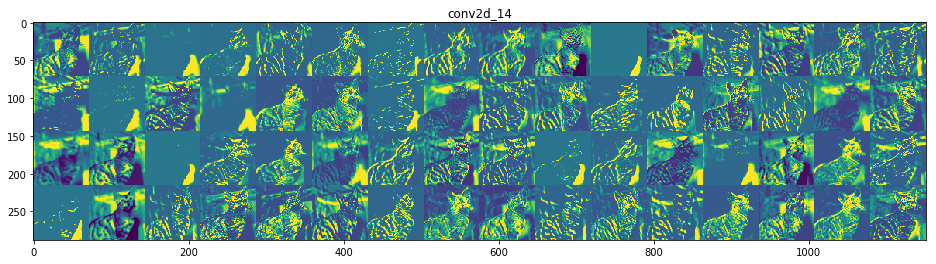

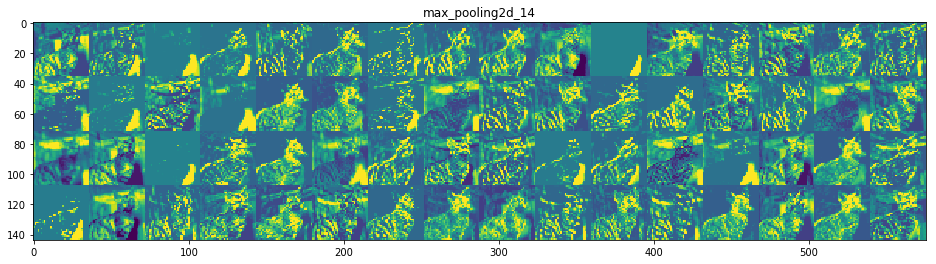

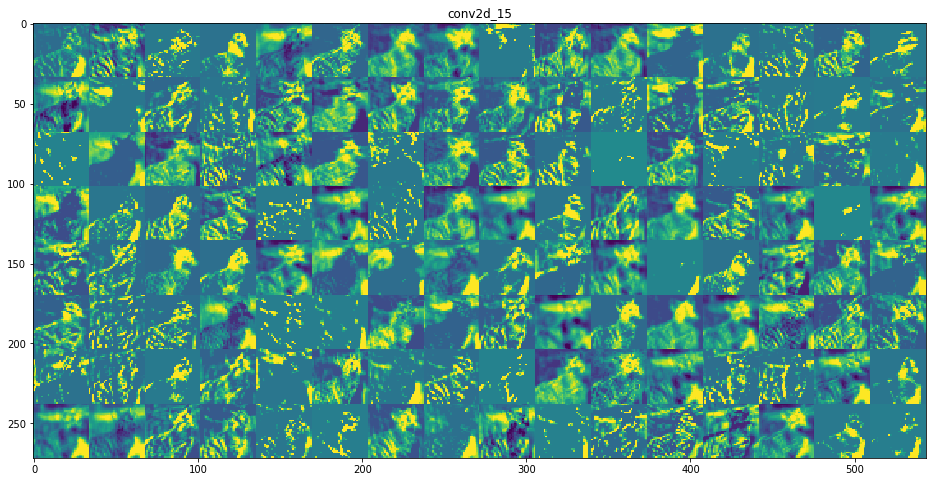

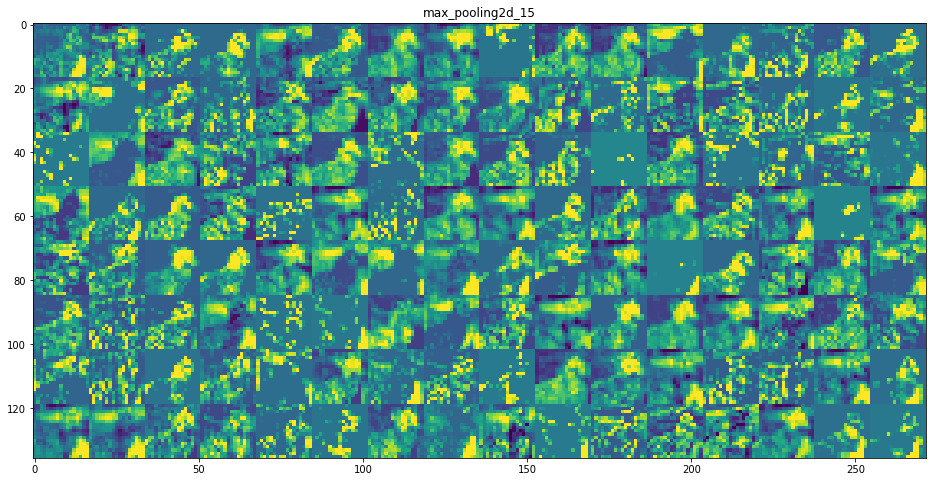

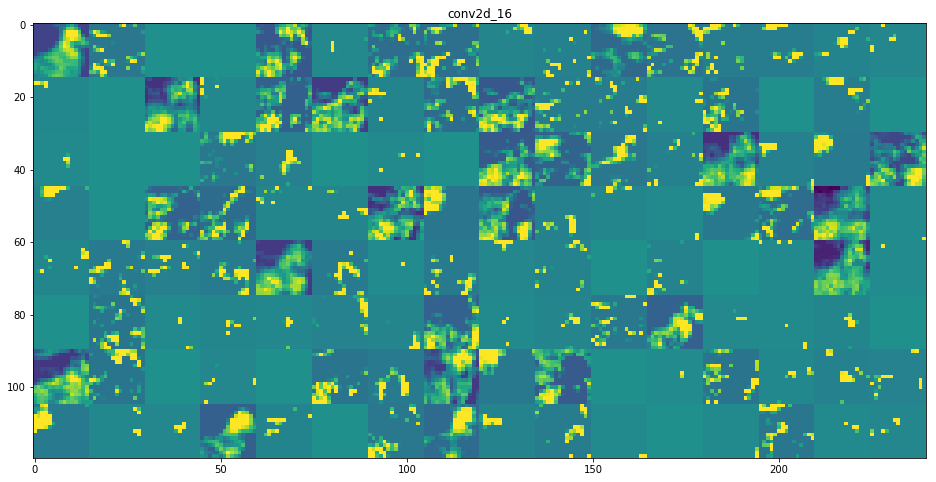

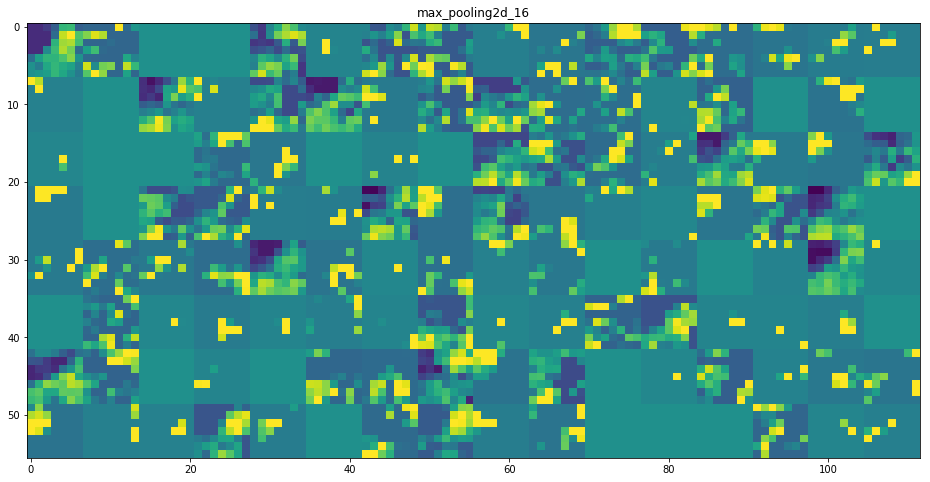

In [21]:
layer_names = [layer.name for layer in conv_layers]
imgs_per_row = 16

for layer_name, activation in zip(layer_names, activations):
    n_features = activation.shape[-1]
    size = activation.shape[1]
    n_rows = n_features // imgs_per_row
    if n_rows * imgs_per_row < n_features:
        n_rows += 1
    display_grid = np.zeros((size * n_rows, size * imgs_per_row))
    
    for channel in range(n_features):
        channel_image = activation[0, :, :, channel]
        channel_image -= channel_image.mean()
        std_deviation = channel_image.std()
        if std_deviation > 0:
            channel_image /= channel_image.std()
        channel_image = channel_image * 64 + 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        row = channel // imgs_per_row
        col = channel - row * imgs_per_row
        display_grid[row * size : (row + 1) * size, col * size : (col + 1) * size] = channel_image

    viz.figure(figsize=(imgs_per_row, n_rows))
    viz.title(layer_name)
    viz.grid(False)
    viz.imshow(display_grid, aspect='auto', cmap='viridis')